In [3]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotly import graph_objs as go
from datetime import datetime
from prophet import Prophet 
import plotly.graph_objs as go

In [4]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]


In [21]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_fundamental_data (tickers):
    stock = yf.Ticker(tickers)

    info = stock.info

    #Profitability rations 
    pe_ratio = info.get('trailingPE')
    forward_pe = info.get('forwardPE')
    peg_ration = info.get('pegRatio')
    profit_margins = info.get('profitMargins')
    roa = info.get('returnOnAssets')
    roe = info.get('returnOnEquity')
    ebitda_margins = info.get('ebitdaMargins')
    operating_margins = info.get('operatingMargins')

    # Liquidity Ratios
    current_ratio = info.get('currentRatio')
    quick_ratio = info.get('quickRatio')

    # Leverage Ratios
    debt_to_equity = info.get('debtToEquity')
    total_debt = info.get('totalDebt')

    # Valuation Metrics
    market_cap = info.get('marketCap')
    enterprise_value = info.get('enterpriseValue')
    ps_ratio = info.get('priceToSalesTrailing12Months')
    pb_ratio = info.get('priceToBook')

    # Growth Metrics
    earnings_growth = info.get('earningsGrowth')
    revenue_growth = info.get('revenueGrowth')

    # Dividend Information
    dividend_yield = info.get('dividendYield')
    payout_ratio = info.get('payoutRatio')
    five_year_avg_dividend_yield = info.get('fiveYearAvgDividendYield')


    data = {
        'Profitability Ratios': {
            'P/E Ratio': pe_ratio,
            'Forward P/E': forward_pe,
            'Profit Margins': profit_margins,
            'ROA': roa,
            'ROE': roe,
            'EBITDA Margins': ebitda_margins,
            'Operating Margins': operating_margins
        },
        'Liquidity Ratios': {
            'Current Ratio': current_ratio,
            'Quick Ratio': quick_ratio
        },
        'Leverage Ratios': {
            'Debt to Equity': debt_to_equity,
            'Total Debt': total_debt
        },
        'Valuation Metrics': {
            'Market Cap': market_cap,
            'Enterprise Value': enterprise_value,
            'Price to Sales Ratio': ps_ratio,
            'Price to Book Ratio': pb_ratio
        },
        'Growth Metrics': {
            'Earnings Growth': earnings_growth,
            'Revenue Growth': revenue_growth
        },
        'Dividend Information': {
            'Dividend Yield': dividend_yield,
            'Payout Ratio': payout_ratio,
            'Five-Year Average Dividend Yield': five_year_avg_dividend_yield
        }
    }
    return data
for ticker in tickers:
    data = fetch_fundamental_data(ticker)
    print(f"Fundamental data for {ticker}:")
    print(data)
    print("\n")

Fundamental data for INTC:
{'Profitability Ratios': {'P/E Ratio': 79.125, 'Forward P/E': 16.657894, 'Profit Margins': 0.017690001, 'ROA': 0.00162, 'ROE': 0.00782, 'EBITDA Margins': 0.19209999, 'Operating Margins': -0.07956}, 'Liquidity Ratios': {'Current Ratio': 1.587, 'Quick Ratio': 1.079}, 'Leverage Ratios': {'Debt to Equity': 44.032, 'Total Debt': 53028999168}, 'Valuation Metrics': {'Market Cap': 81201242112, 'Enterprise Value': 110162239488, 'Price to Sales Ratio': 1.4731454, 'Price to Book Ratio': 0.7046905}, 'Growth Metrics': {'Earnings Growth': None, 'Revenue Growth': -0.009}, 'Dividend Information': {'Dividend Yield': 0.026300002, 'Payout Ratio': 2.0833, 'Five-Year Average Dividend Yield': 2.86}}


Fundamental data for GFS:
{'Profitability Ratios': {'P/E Ratio': 29.246574, 'Forward P/E': 22.124353, 'Profit Margins': 0.118190005, 'ROA': 0.03211, 'ROE': 0.07461, 'EBITDA Margins': 0.35022998, 'Operating Margins': 0.09804}, 'Liquidity Ratios': {'Current Ratio': 2.216, 'Quick Ratio'

In [5]:
START = "2020-01-01"
TODAY = datetime.today().strftime("%Y-%m-%d")

In [6]:
start_date = '2020-08-07'  # Replace with your desired start date
end_date = '2023-08-07' 

In [7]:
from sklearn.preprocessing import StandardScaler

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ARM']: YFChartError("%ticker%: Data doesn't exist for startDate = 1596772800, endDate = 1691380800")


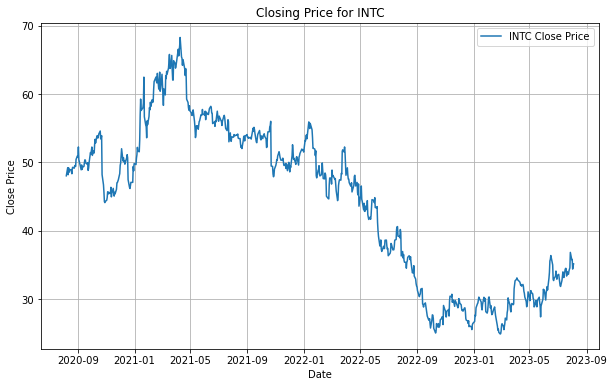

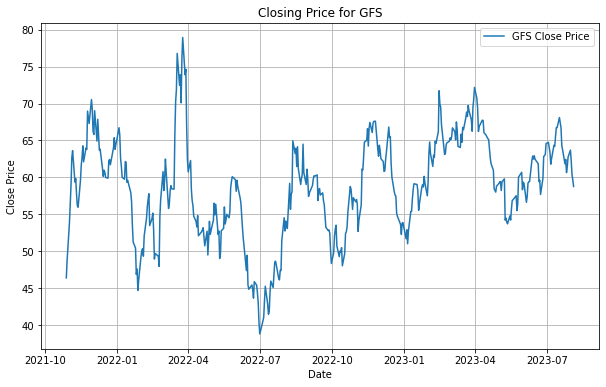

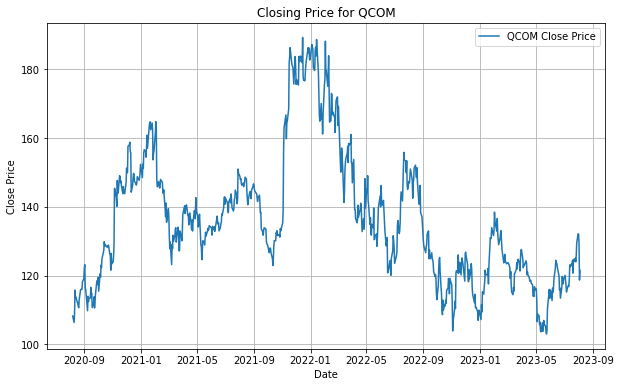

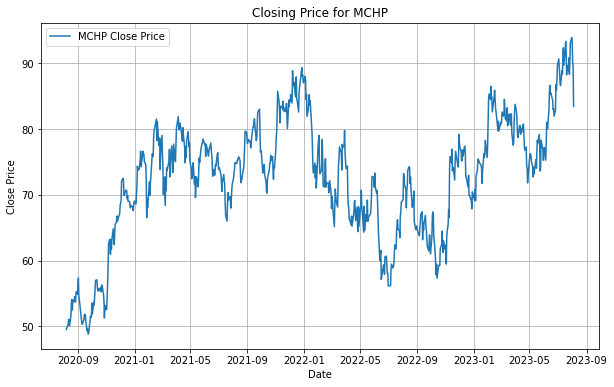

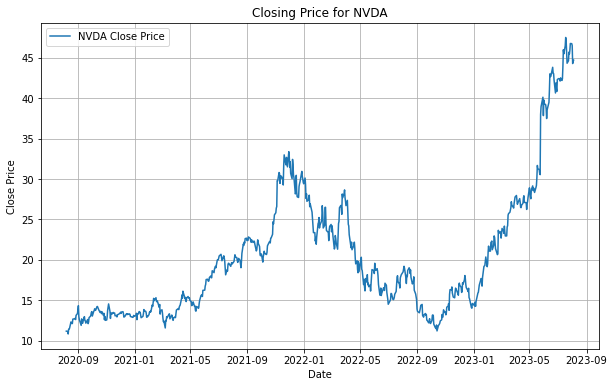

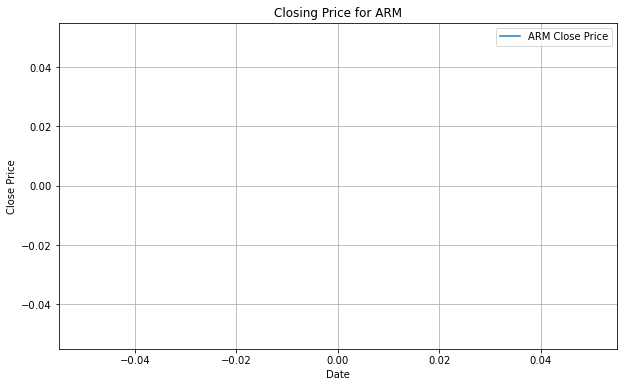

In [8]:
import matplotlib.pyplot as plt

data = pd.DataFrame()

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Ticker'] = ticker
    stock_data['Date'] = stock_data.index  # Add Date column
    data = pd.concat([data, stock_data], axis=0)

# Reset index for easy manipulation
data.reset_index(drop=True, inplace=True)

# Plot each ticker's close price  
for ticker in tickers:
    df_ticker = data[data['Ticker'] == ticker]  # Filter data for the current ticker
    plt.figure(figsize=(10, 6))
    plt.plot(df_ticker['Date'], df_ticker['Close'], label=f"{ticker} Close Price")
    plt.title(f"Closing Price for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.legend()
    plt.show()

In [9]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

start_date = "2015-01-01"
end_date = "2024-08-07"

results = []

for ticker in tickers: #fetch data for 1 ticker
    stock = yf.Ticker(ticker)
    historical_data = stock.history(start=start_date, end=end_date)
    info = stock.info

#extract key metrics
  
    data = []

    for date, row in historical_data.iterrows():
        data.append({
        'Date': date,
        'Ticker': ticker,
        'Close': row['Close'],
        'Open': row['Open'],
        'High': row['High'],
        'Low': row['Low'],
        'Volume': row['Volume'],
        'Adjusted Close': row['Close'],  # This should be 'Adj Close' if available
       
    })


       

        #Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(data)

        #convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

        #set the date column as the index
    df.set_index('Date', inplace=True)

     #drop the rows with remaining NaN values
    df.dropna(inplace=True)



        #create features and target

    df['Previous Close'] = df.groupby('Ticker')['Close'].shift(1)#previous days closing as a feature
    df ['Target'] = df.groupby('Ticker')['Close'].shift(-1) #next days closing

    df.dropna(inplace=True)

    print(f"Descriptive statistics for {ticker}:\n, df.describe()")


    correlation_matrix = df.corr()
    print(f"Correlation matrix for {ticker}:\n", correlation_matrix)
        #drop rows with nan  values due to shift


        #select relevant columns for features
    features = ['Previous Close', 'Open', 'High', 'Low', 'Volume', 'Adjusted Close' ]

    X = df[features]
    y = df['Target']

    scaler = StandardScaler()

    # Fit and transform the features
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    model = LinearRegression()
    model.fit(X_train, y_train)

    #make predictions
    y_pred = model.predict(X_test)

    #evaluate the model

    mse = mean_squared_error(y_test, y_pred)

    print(f"Mean Squared Error for {ticker}: {mse}")

    #display model coefficients
    print("Model Coefficiants Shape:", model.coef_.shape)
    print("Feature Columns shape:", X.shape[1])
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(f" Coeffticients for {ticker}: \n", coefficients)

    results.append({
        'Ticker': ticker,
        'MSE': mse,
        'coefficients': coefficients
    })



Descriptive statistics for INTC:
, df.describe()
Correlation matrix for INTC:
                    Close      Open      High       Low    Volume  \
Close           1.000000  0.997881  0.998917  0.999019 -0.079447   
Open            0.997881  1.000000  0.998924  0.999062 -0.075804   
High            0.998917  0.998924  1.000000  0.998569 -0.062257   
Low             0.999019  0.999062  0.998569  1.000000 -0.092551   
Volume         -0.079447 -0.075804 -0.062257 -0.092551  1.000000   
Adjusted Close  1.000000  0.997881  0.998917  0.999019 -0.079447   
Previous Close  0.995856  0.998284  0.997190  0.997100 -0.062843   
Target          0.995860  0.994560  0.995271  0.995466 -0.086560   

                Adjusted Close  Previous Close    Target  
Close                 1.000000        0.995856  0.995860  
Open                  0.997881        0.998284  0.994560  
High                  0.998917        0.997190  0.995271  
Low                   0.999019        0.997100  0.995466  
Volume       

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define the tickers
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA"]

# Define the tickers
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

# Initialize a list to store the results
results_list = []

for ticker in tickers:
    try:
        # Fetch the data for each ticker
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        stock_data['Ticker'] = ticker
        stock_data['Date'] = stock_data.index  # Add Date column
        
        # Create 'Previous Close' column
        stock_data['Previous Close'] = stock_data['Close'].shift(1)
        
        # Drop any rows with NaN values created by shifting
        stock_data.dropna(inplace=True)
        
        # Ensure target variable is binary for classification
        stock_data['Target'] = stock_data['Close'].shift(-1) > stock_data['Close']
        stock_data.dropna(inplace=True)
        
        # Define features and target variable
        features = ['Previous Close', 'Open', 'High', 'Low', 'Volume', 'Close']  # Adjust if necessary
        X = stock_data[features]
        y = stock_data['Target']
        
        # Check if there are enough samples to split
        if len(X) < 2:  # Less than 2 samples can't be split into train and test sets
            print(f"Not enough data for {ticker}. Skipping this ticker.")
            continue
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Initialize and train the Random Forest classifier
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = rf_classifier.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Store the results
        results_list.append({
            'Ticker': ticker,
            'Accuracy': accuracy,
            'Classification Report': report
        })

    except Exception as e:
        print(f"Error processing {ticker}: {e}")
        continue

# Convert results list to DataFrame
results = pd.DataFrame(results_list)

# Display the results
print(results)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


  Ticker  Accuracy                              Classification Report
0   INTC  0.484472  {'False': {'precision': 0.4686192468619247, 'r...
1    GFS  0.503597  {'False': {'precision': 0.47540983606557374, '...
2   QCOM  0.525880  {'False': {'precision': 0.5045871559633027, 'r...
3   MCHP  0.509317  {'False': {'precision': 0.4854771784232365, 'r...
4   NVDA  0.532091  {'False': {'precision': 0.4852941176470588, 'r...
5    ARM  0.444444  {'False': {'precision': 0.47058823529411764, '...


In [11]:
# Function to print key metrics in a simple format
def print_metrics(results):
    for index, row in results.iterrows():
        print(f"Ticker: {row['Ticker']}")
        print(f"Accuracy: {row['Accuracy']:.2f}")
        
        class_report = row['Classification Report']
        
        # Extract metrics for the 'True' class
        true_class_metrics = class_report['True']
        print(f"  Precision (True class): {true_class_metrics['precision']:.2f}")
        print(f"  Recall (True class): {true_class_metrics['recall']:.2f}")
        print(f"  F1-Score (True class): {true_class_metrics['f1-score']:.2f}")
        
        print("\n")

# Print the simplified metrics for each ticker
print_metrics(results)


Ticker: INTC
Accuracy: 0.48
  Precision (True class): 0.50
  Recall (True class): 0.49
  F1-Score (True class): 0.49


Ticker: GFS
Accuracy: 0.50
  Precision (True class): 0.53
  Recall (True class): 0.56
  F1-Score (True class): 0.54


Ticker: QCOM
Accuracy: 0.53
  Precision (True class): 0.54
  Recall (True class): 0.57
  F1-Score (True class): 0.56


Ticker: MCHP
Accuracy: 0.51
  Precision (True class): 0.53
  Recall (True class): 0.51
  F1-Score (True class): 0.52


Ticker: NVDA
Accuracy: 0.53
  Precision (True class): 0.57
  Recall (True class): 0.60
  F1-Score (True class): 0.58


Ticker: ARM
Accuracy: 0.44
  Precision (True class): 0.43
  Recall (True class): 0.57
  F1-Score (True class): 0.49




Regression model using Facebook Prophet\
Facebook has released Facebook Prophet, which is another valuable tool for time series forecasting. It is designed to capture seasonality and holiday effects in data, making it suitable for predicting stock prices with such patterns. It is well-suited for forecasting problems that involve daily or seasonal patterns, holiday effects, and irregular data.

In [12]:
from prophet.plot import plot_plotly

In [13]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker):
    #fetch the data
    data = yf.download(ticker, start=START, end=TODAY)
    data.reset_index(inplace=True)

    #extract necessary columns, rename
    data =data[['Date', 'Close']]
    data.columns = ['ds', 'y']
    #Initialize and fit the prophet model 
    prophet= Prophet(daily_seasonality=True)
    prophet.fit(data)

    #Make future predictions

    future_dates = prophet.make_future_dataframe(periods=365)
    predictions = prophet.predict(future_dates)

    #plotting

    fig = plot_plotly(prophet,predictions)
    fig.update_layout(title_text=f"{ticker} time series Data and forecast")
    
 # Add title and legend
    fig.update_layout(
    title=f'{ticker} - Actual vs Predicted Prices',
    legend_title='Legend')

#show figure
    fig.show()

    #Loop through each ticker and process the data

for ticker in tickers:
    fetch_and_forecast(ticker)
    



[*********************100%%**********************]  1 of 1 completed
15:06:42 - cmdstanpy - INFO - Chain [1] start processing
15:06:42 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:06:45 - cmdstanpy - INFO - Chain [1] start processing
15:06:45 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:06:47 - cmdstanpy - INFO - Chain [1] start processing
15:06:48 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:06:50 - cmdstanpy - INFO - Chain [1] start processing
15:06:51 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:06:53 - cmdstanpy - INFO - Chain [1] start processing
15:06:54 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:06:56 - cmdstanpy - INFO - Chain [1] start processing
15:06:56 - cmdstanpy - INFO - Chain [1] done processing


In [14]:

import plotly.graph_objects as go


# List of tickers
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker):
    # Fetch the data
    data = yf.download(ticker, start=START, end=TODAY)
    data.reset_index(inplace=True)

    # Extract necessary columns, rename
    data = data[['Date', 'Close']]
    data.columns = ['ds', 'y']
    
    # Initialize and fit the Prophet model
    prophet = Prophet(daily_seasonality=True)
    prophet.fit(data)

    # Make future predictions
    future_dates = prophet.make_future_dataframe(periods=365)
    predictions = prophet.predict(future_dates)

    # Plotting
    fig = plot_plotly(prophet, predictions)
    
    # Customize the layout: title and legend
    fig.update_layout(
        title=f'{ticker} - Time Series Data and Forecast',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        legend_title='Legend'
    )

    # Show figure
    fig.show()

# Loop through each ticker and process the data
for ticker in tickers:
    fetch_and_forecast(ticker)


[*********************100%%**********************]  1 of 1 completed


15:06:58 - cmdstanpy - INFO - Chain [1] start processing
15:06:59 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:07:01 - cmdstanpy - INFO - Chain [1] start processing
15:07:01 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:07:03 - cmdstanpy - INFO - Chain [1] start processing
15:07:04 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:07:06 - cmdstanpy - INFO - Chain [1] start processing
15:07:08 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:07:10 - cmdstanpy - INFO - Chain [1] start processing
15:07:11 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:07:13 - cmdstanpy - INFO - Chain [1] start processing
15:07:13 - cmdstanpy - INFO - Chain [1] done processing


Initialize and fit the model

[*********************100%%**********************]  1 of 1 completed
15:07:15 - cmdstanpy - INFO - Chain [1] start processing
15:07:16 - cmdstanpy - INFO - Chain [1] done processing


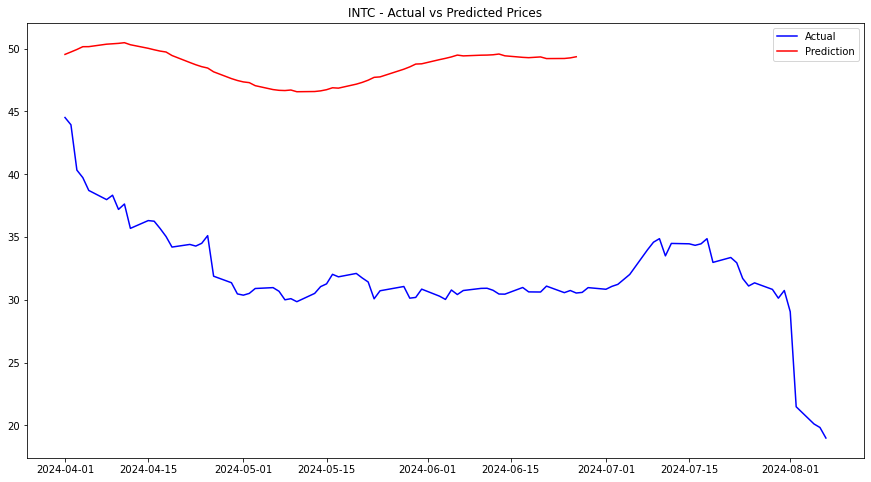

[*********************100%%**********************]  1 of 1 completed
15:07:18 - cmdstanpy - INFO - Chain [1] start processing
15:07:19 - cmdstanpy - INFO - Chain [1] done processing


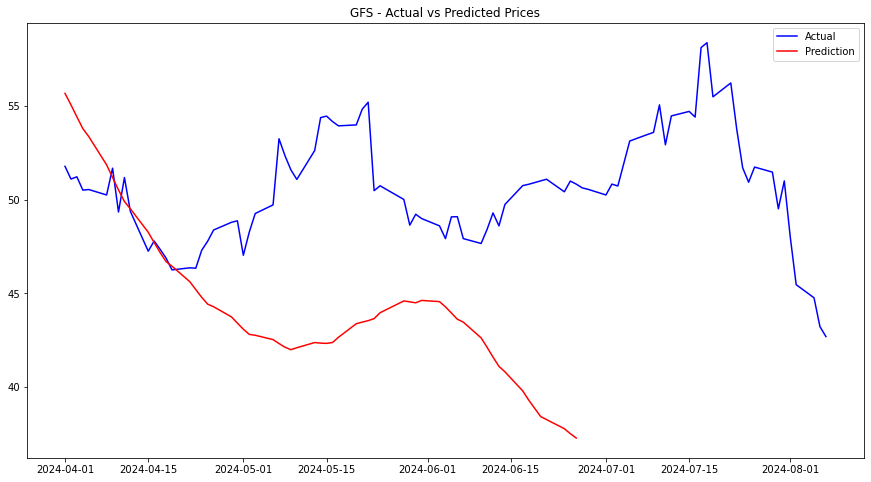

[*********************100%%**********************]  1 of 1 completed
15:07:21 - cmdstanpy - INFO - Chain [1] start processing
15:07:22 - cmdstanpy - INFO - Chain [1] done processing


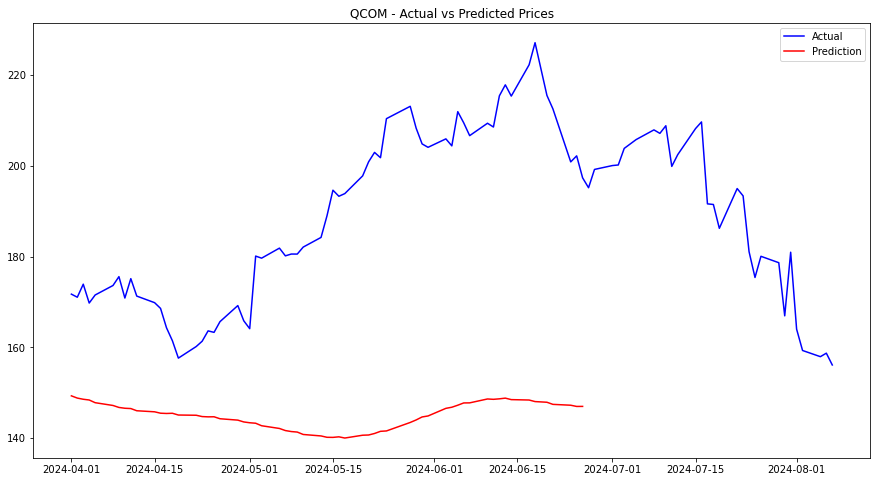

[*********************100%%**********************]  1 of 1 completed
15:07:24 - cmdstanpy - INFO - Chain [1] start processing
15:07:25 - cmdstanpy - INFO - Chain [1] done processing


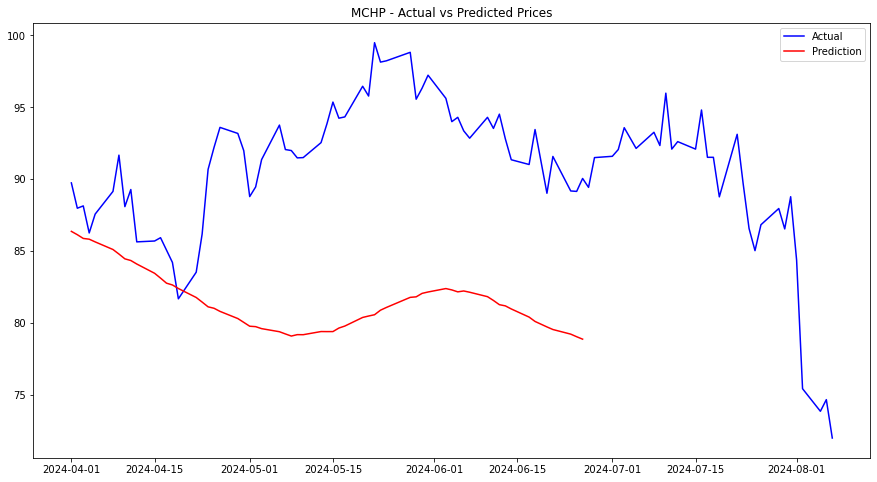

[*********************100%%**********************]  1 of 1 completed
15:07:27 - cmdstanpy - INFO - Chain [1] start processing
15:07:29 - cmdstanpy - INFO - Chain [1] done processing


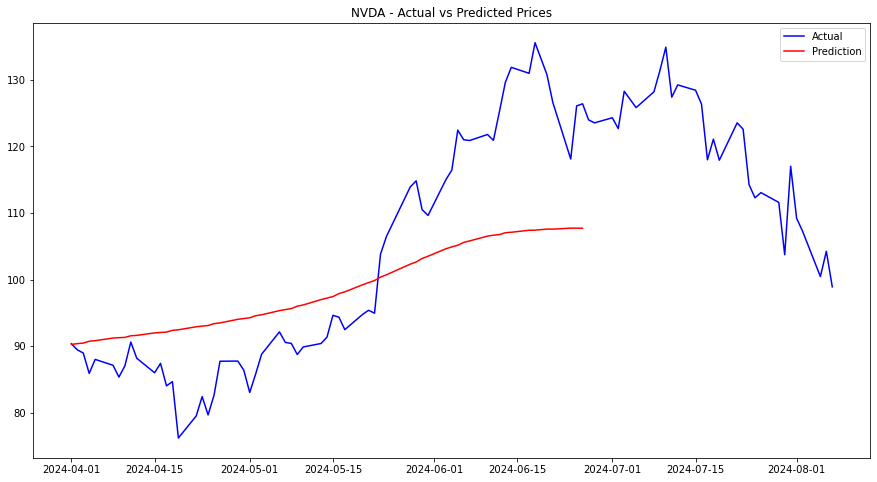

[*********************100%%**********************]  1 of 1 completed
15:07:31 - cmdstanpy - INFO - Chain [1] start processing
15:07:31 - cmdstanpy - INFO - Chain [1] done processing


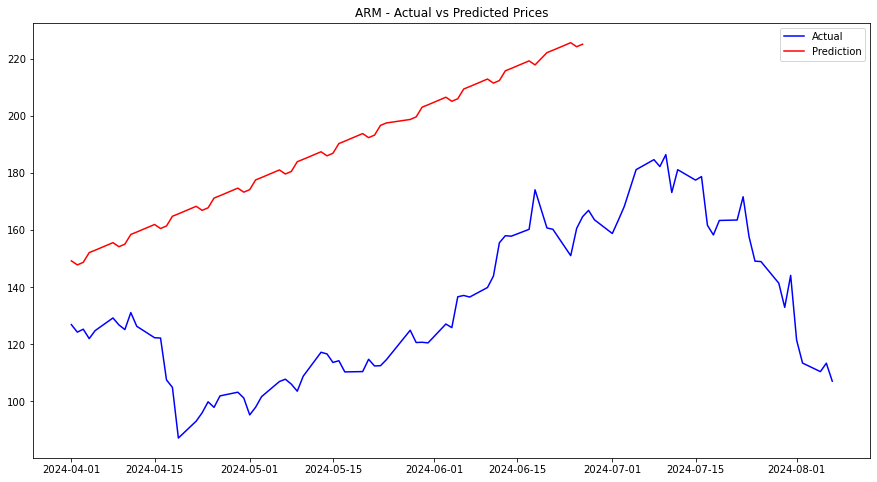

In [15]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker, test_period_days =90):
    #fetch the data
    data = yf.download(ticker, start="2020-07-08", end=pd.Timestamp.today().strftime("%Y-%m-%d"))
    data.reset_index(inplace=True)

    #extract necessary columns, rename
    data =data[['Date', 'Close']]
    data.columns = ['ds', 'y']

    #split the data into training and test sets

    test_data = data.iloc[-test_period_days:]
    training_data = data.iloc[:-test_period_days]


    #Initialize and fit the prophet model with daily seasonaility
    prophet= Prophet(daily_seasonality=True)
    prophet.fit(training_data)

    #Make future predictions

    future_dates = prophet.make_future_dataframe(periods=test_period_days)
    predictions = prophet.predict(future_dates)

    #Visualize the comparioson between predicted and actual prices
    plt.figure(figsize=(15, 8))

    #filter predictions to only include the test period

    pred = predictions[predictions['ds'].isin(test_data['ds'])]

    #plot actual prices
    plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Actual', color='blue')

    #plot predicted prices
    plt.plot(pd.to_datetime(pred['ds']), pred['yhat'], label='Prediction', color='red')

    # add title and legend

    plt.title(f'{ticker} - Actual vs Predicted Prices')
    plt.legend()

    #display
    plt.show()

    #Loop through each ticker and process the data
test_period_days = 90 
for ticker in tickers:

    fetch_and_forecast(ticker, test_period_days)
    



[*********************100%%**********************]  1 of 1 completed
15:10:11 - cmdstanpy - INFO - Chain [1] start processing
15:10:12 - cmdstanpy - INFO - Chain [1] done processing


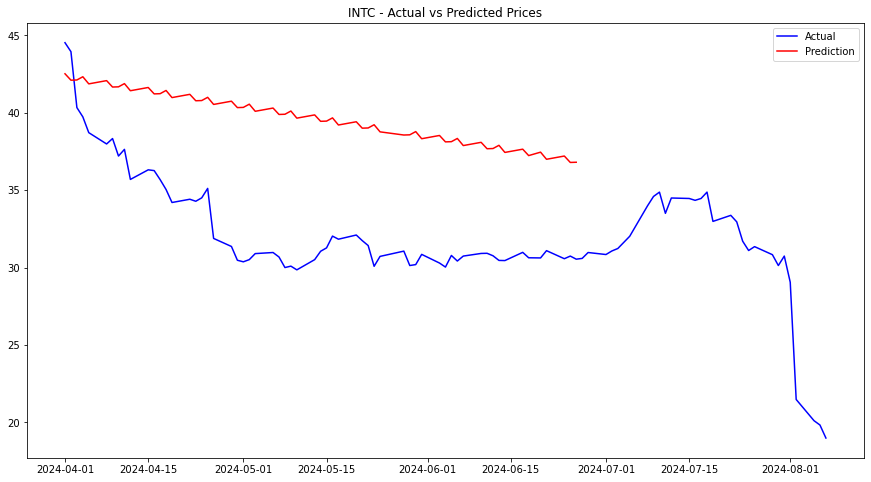

[*********************100%%**********************]  1 of 1 completed
15:10:14 - cmdstanpy - INFO - Chain [1] start processing
15:10:14 - cmdstanpy - INFO - Chain [1] done processing


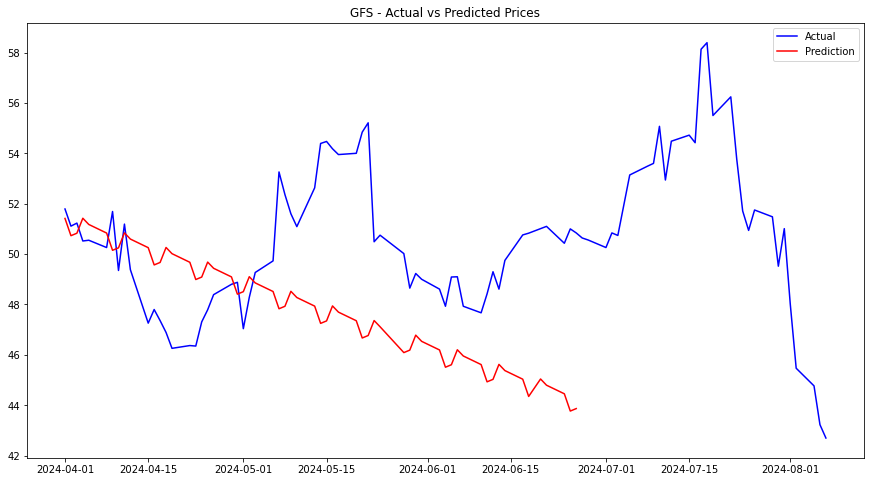

[*********************100%%**********************]  1 of 1 completed
15:10:16 - cmdstanpy - INFO - Chain [1] start processing
15:10:17 - cmdstanpy - INFO - Chain [1] done processing


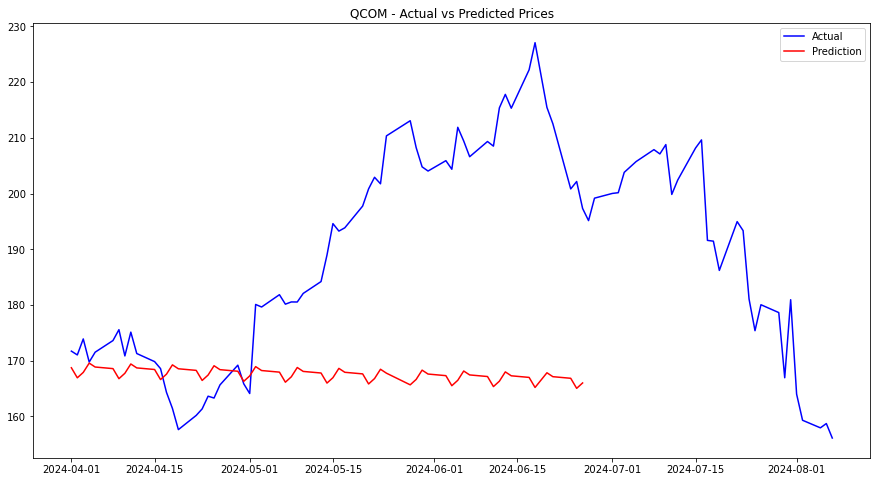

[*********************100%%**********************]  1 of 1 completed
15:10:19 - cmdstanpy - INFO - Chain [1] start processing
15:10:20 - cmdstanpy - INFO - Chain [1] done processing


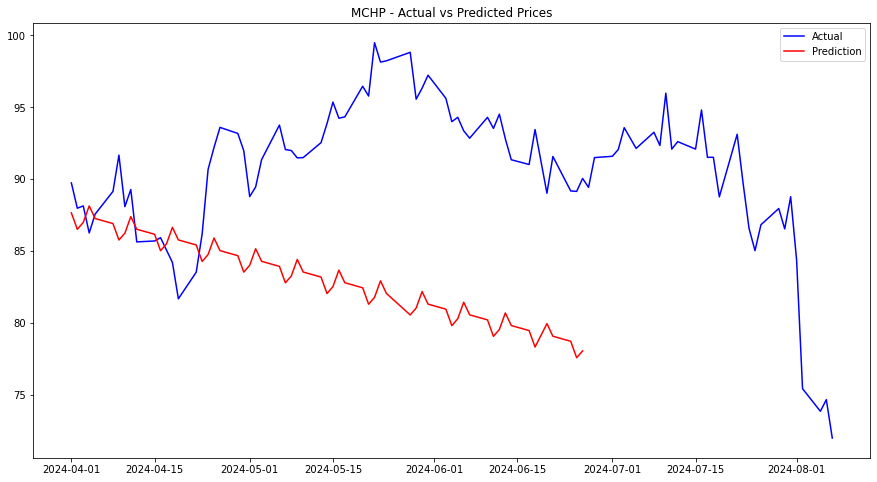

[*********************100%%**********************]  1 of 1 completed
15:10:22 - cmdstanpy - INFO - Chain [1] start processing
15:10:23 - cmdstanpy - INFO - Chain [1] done processing


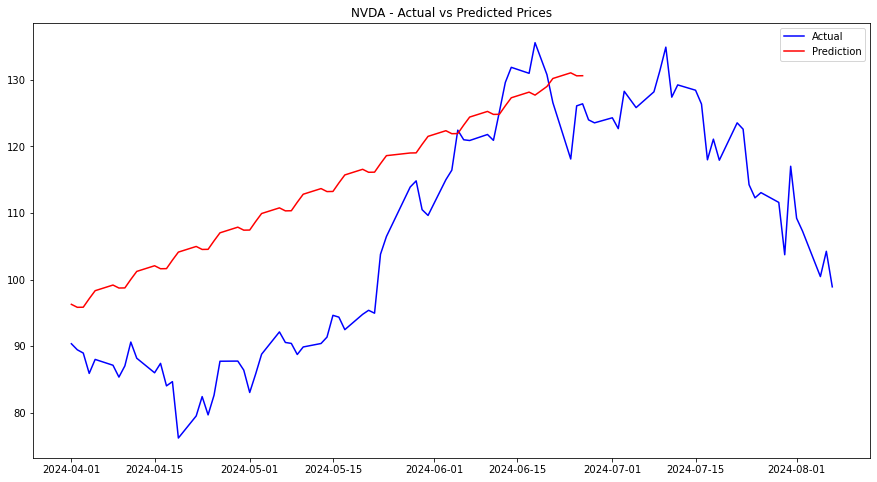

[*********************100%%**********************]  1 of 1 completed
15:10:25 - cmdstanpy - INFO - Chain [1] start processing
15:10:26 - cmdstanpy - INFO - Chain [1] done processing


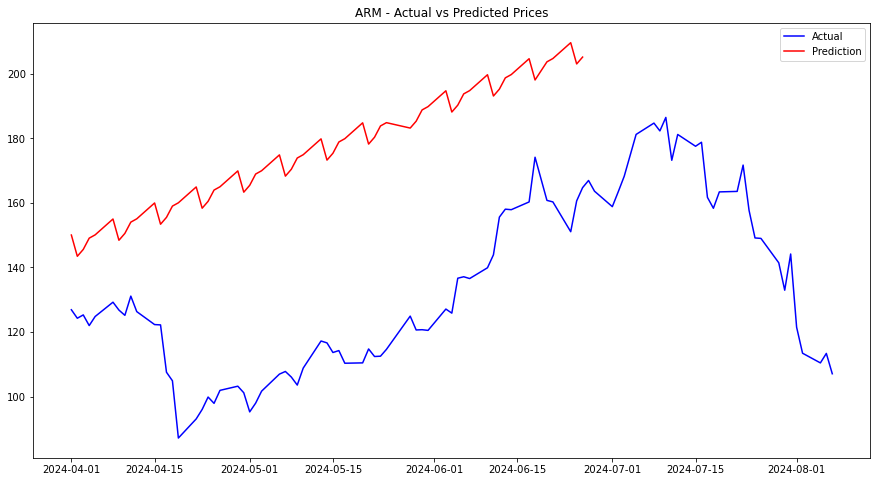

In [19]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker, test_period_days =90):
    #fetch the data
    data = yf.download(ticker, start="2024-02-01", end=pd.Timestamp.today().strftime("%Y-%m-%d"))
    data.reset_index(inplace=True)

    #extract necessary columns, rename
    data =data[['Date', 'Close']]
    data.columns = ['ds', 'y']

    #split the data into training and test sets

    test_data = data.iloc[-test_period_days:]
    training_data = data.iloc[:-test_period_days]


    #Initialize and fit the prophet model with daily seasonaility
    prophet= Prophet(daily_seasonality=True)
    prophet.fit(training_data)

    #Make future predictions

    future_dates = prophet.make_future_dataframe(periods=test_period_days)
    predictions = prophet.predict(future_dates)



    #Visualize the comparioson between predicted and actual prices
    plt.figure(figsize=(15, 8))

    #filter predictions to only include the test period

    pred = predictions[predictions['ds'].isin(test_data['ds'])]

    #plot actual prices
    plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Actual', color='blue')

    #plot predicted prices
    plt.plot(pd.to_datetime(pred['ds']), pred['yhat'], label='Prediction', color='red')

    # add title and legend

    plt.title(f'{ticker} - Actual vs Predicted Prices')
    plt.legend()

    #display
    plt.show()

    #Loop through each ticker and process the data
test_period_days = 90 
for ticker in tickers:

    fetch_and_forecast(ticker, test_period_days)
    



[*********************100%%**********************]  1 of 1 completed


15:07:48 - cmdstanpy - INFO - Chain [1] start processing
15:07:48 - cmdstanpy - INFO - Chain [1] done processing


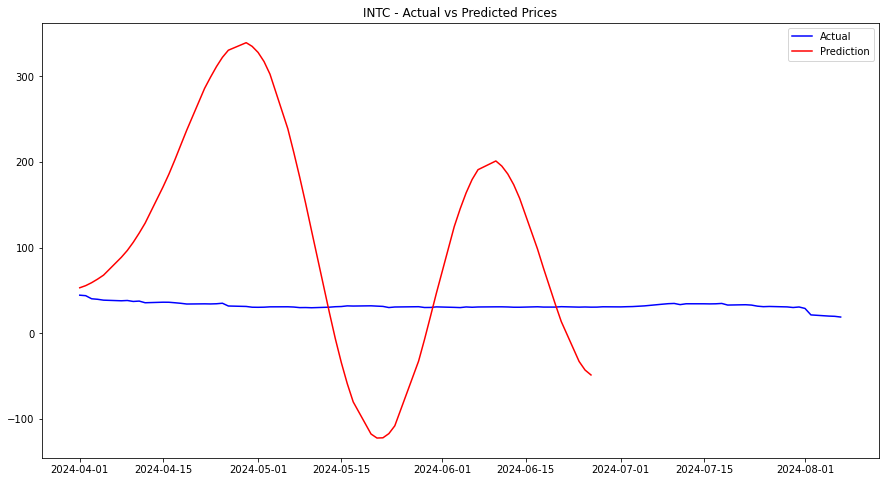

[*********************100%%**********************]  1 of 1 completed
15:07:50 - cmdstanpy - INFO - Chain [1] start processing
15:07:51 - cmdstanpy - INFO - Chain [1] done processing


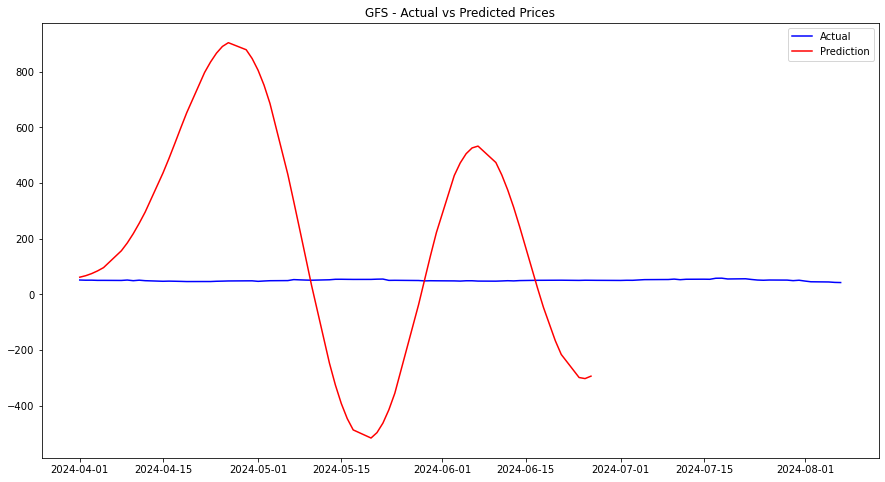

[*********************100%%**********************]  1 of 1 completed
15:07:53 - cmdstanpy - INFO - Chain [1] start processing
15:07:54 - cmdstanpy - INFO - Chain [1] done processing


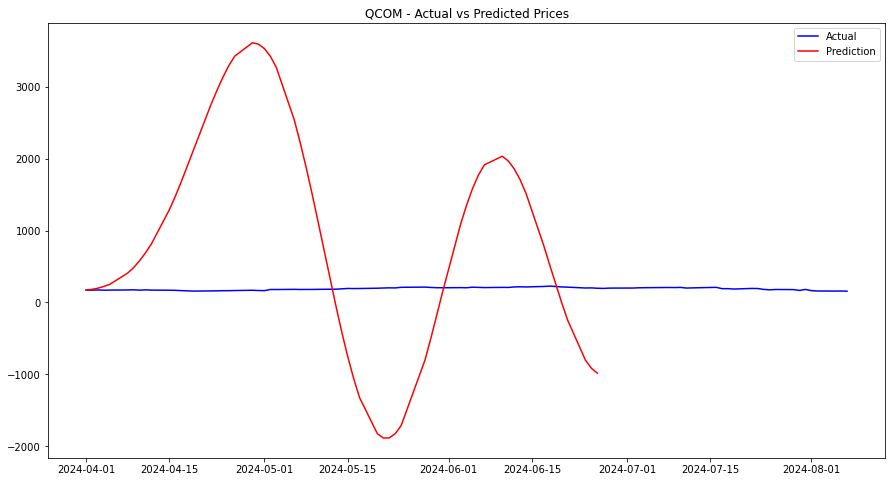

[*********************100%%**********************]  1 of 1 completed
15:07:56 - cmdstanpy - INFO - Chain [1] start processing
15:07:57 - cmdstanpy - INFO - Chain [1] done processing


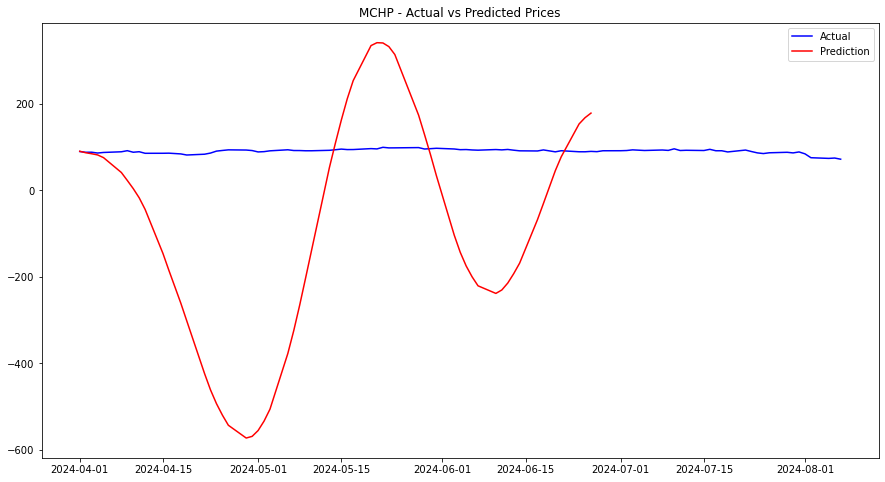

[*********************100%%**********************]  1 of 1 completed
15:07:59 - cmdstanpy - INFO - Chain [1] start processing
15:08:00 - cmdstanpy - INFO - Chain [1] done processing


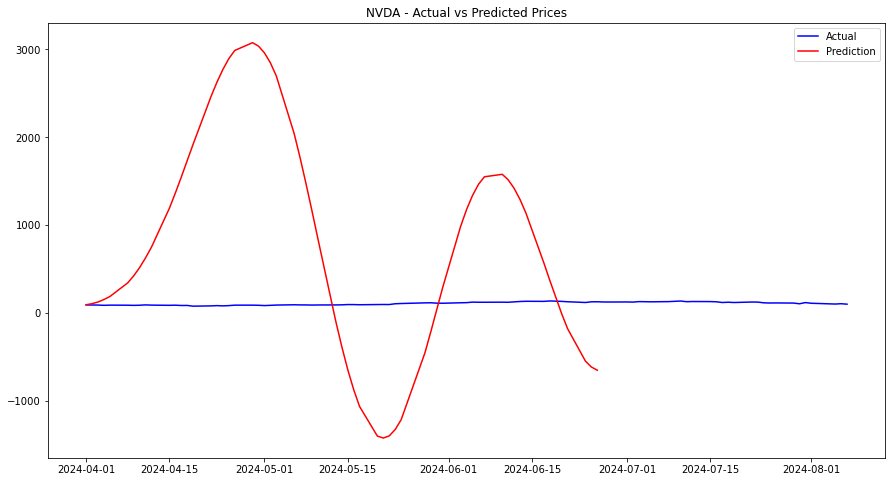

[*********************100%%**********************]  1 of 1 completed
15:08:02 - cmdstanpy - INFO - Chain [1] start processing
15:08:03 - cmdstanpy - INFO - Chain [1] done processing


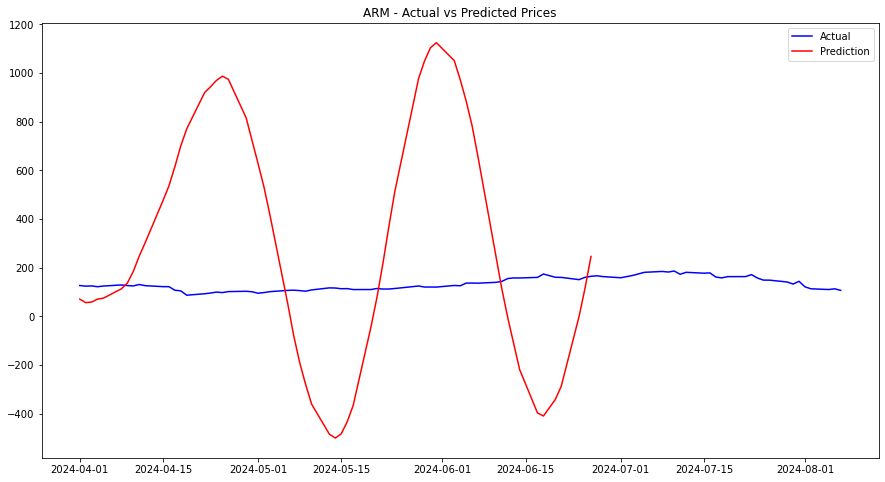

In [17]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker, test_period_days =90):
    #fetch the data
    data = yf.download(ticker, start="2024-02-01", end=pd.Timestamp.today().strftime("%Y-%m-%d"))
    data.reset_index(inplace=True)

    #extract necessary columns, rename
    data =data[['Date', 'Close']]
    data.columns = ['ds', 'y']

    #split the data into training and test sets

    test_data = data.iloc[-test_period_days:]
    training_data = data.iloc[:-test_period_days]


    #Initialize and fit the prophet model:
    # daily seasonaility : adds daily seasonality to the model
    # weekly seasonality adds weekly seasonality to the model 
    # yearly seasonality adds yearly seasonality
    # change point prior scale adjust the flexibility of the automatic selection 
    prophet= Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.05)
    
    # Adding monthly seasonality
    # - add_seasonality: Adds a custom seasonal component to the model
    # - name: The name of the seasonality component
    # - period: The period of the seasonality in days
    # - fourier_order: Fourier Order: tells model how detailed the repeating pattern should be. Higher numbers = more detailed, lower=less

    prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)    

    #fit the model after the training data
    prophet.fit(training_data)

    #Make future predictions
    
    # - make_future_dataframe: Creates a DataFrame with future dates for prediction
    # - periods: The number of days to predict into the future

    future_dates = prophet.make_future_dataframe(periods=test_period_days)
    predictions = prophet.predict(future_dates)

    #Visualize the comparioson between predicted and actual prices
    plt.figure(figsize=(15, 8))

    #filter predictions to only include the test period

    pred = predictions[predictions['ds'].isin(test_data['ds'])]

    #plot actual prices
    plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Actual', color='blue')

    #plot predicted prices
    plt.plot(pd.to_datetime(pred['ds']), pred['yhat'], label='Prediction', color='red')

    # add title and legend

    plt.title(f'{ticker} - Actual vs Predicted Prices')
    plt.legend()

    #display
    plt.show()

    #Loop through each ticker and process the data
test_period_days = 90 
for ticker in tickers:

    fetch_and_forecast(ticker, test_period_days)
    



In [18]:
tickers = ["INTC", "GFS", "QCOM", "MCHP", "NVDA", "ARM"]

def fetch_and_forecast(ticker, test_period_days =90):
    #fetch the data
    data = yf.download(ticker, start="2024-02-01", end=pd.Timestamp.today().strftime("%Y-%m-%d"))
    data.reset_index(inplace=True)

    #extract necessary columns, rename
    data =data[['Date', 'Close']]
    data.columns = ['ds', 'y']

    #split the data into training and test sets

    test_data = data.iloc[-test_period_days:]
    training_data = data.iloc[:-test_period_days]


    #Initialize and fit the prophet model with daily seasonaility
    prophet= Prophet(daily_seasonality=True)
    prophet.fit(training_data)

    #Make future predictions

    future_dates = prophet.make_future_dataframe(periods=test_period_days)
    predictions = prophet.predict(future_dates)



    #Visualize the comparioson between predicted and actual prices
    #plt.figure(figsize=(15, 8))

    #filter predictions to only include the test period

    pred = predictions[predictions['ds'].isin(test_data['ds'])]

    fig = plot_plotly(prophet, predictions)
    
    # Customize the layout: title and legend
    fig.update_layout(
        title=f'{ticker} - Time Series Data and Forecast',
        xaxis_title='Date',
        yaxis_title='Stock Price',
        legend_title='Legend'
    )

    # Show figure
    fig.show()
test_period_days = 90 
for ticker in tickers:

    fetch_and_forecast(ticker, test_period_days)
    



[*********************100%%**********************]  1 of 1 completed


15:08:05 - cmdstanpy - INFO - Chain [1] start processing
15:08:05 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:08:06 - cmdstanpy - INFO - Chain [1] start processing
15:08:07 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:08:08 - cmdstanpy - INFO - Chain [1] start processing
15:08:09 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:08:10 - cmdstanpy - INFO - Chain [1] start processing
15:08:12 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:08:13 - cmdstanpy - INFO - Chain [1] start processing
15:08:14 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
15:08:15 - cmdstanpy - INFO - Chain [1] start processing
15:08:16 - cmdstanpy - INFO - Chain [1] done processing
